In [6]:

!gdown  1v_Lb24kNunFeg1HxvdSiq6RpPYaVq4yR

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import warnings
import plotly.figure_factory as ff
import warnings
import math
from sklearn.exceptions import ConvergenceWarning

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.exceptions import ConvergenceWarning

Downloading...
From: https://drive.google.com/uc?id=1v_Lb24kNunFeg1HxvdSiq6RpPYaVq4yR
To: /content/WA_Fn-UseC_-Telco-Customer-Churn.csv
100% 978k/978k [00:00<00:00, 130MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<ipython-input-7-5d0f7d40afd5>:23: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Figure size 2500x1000 with 0 Axes>

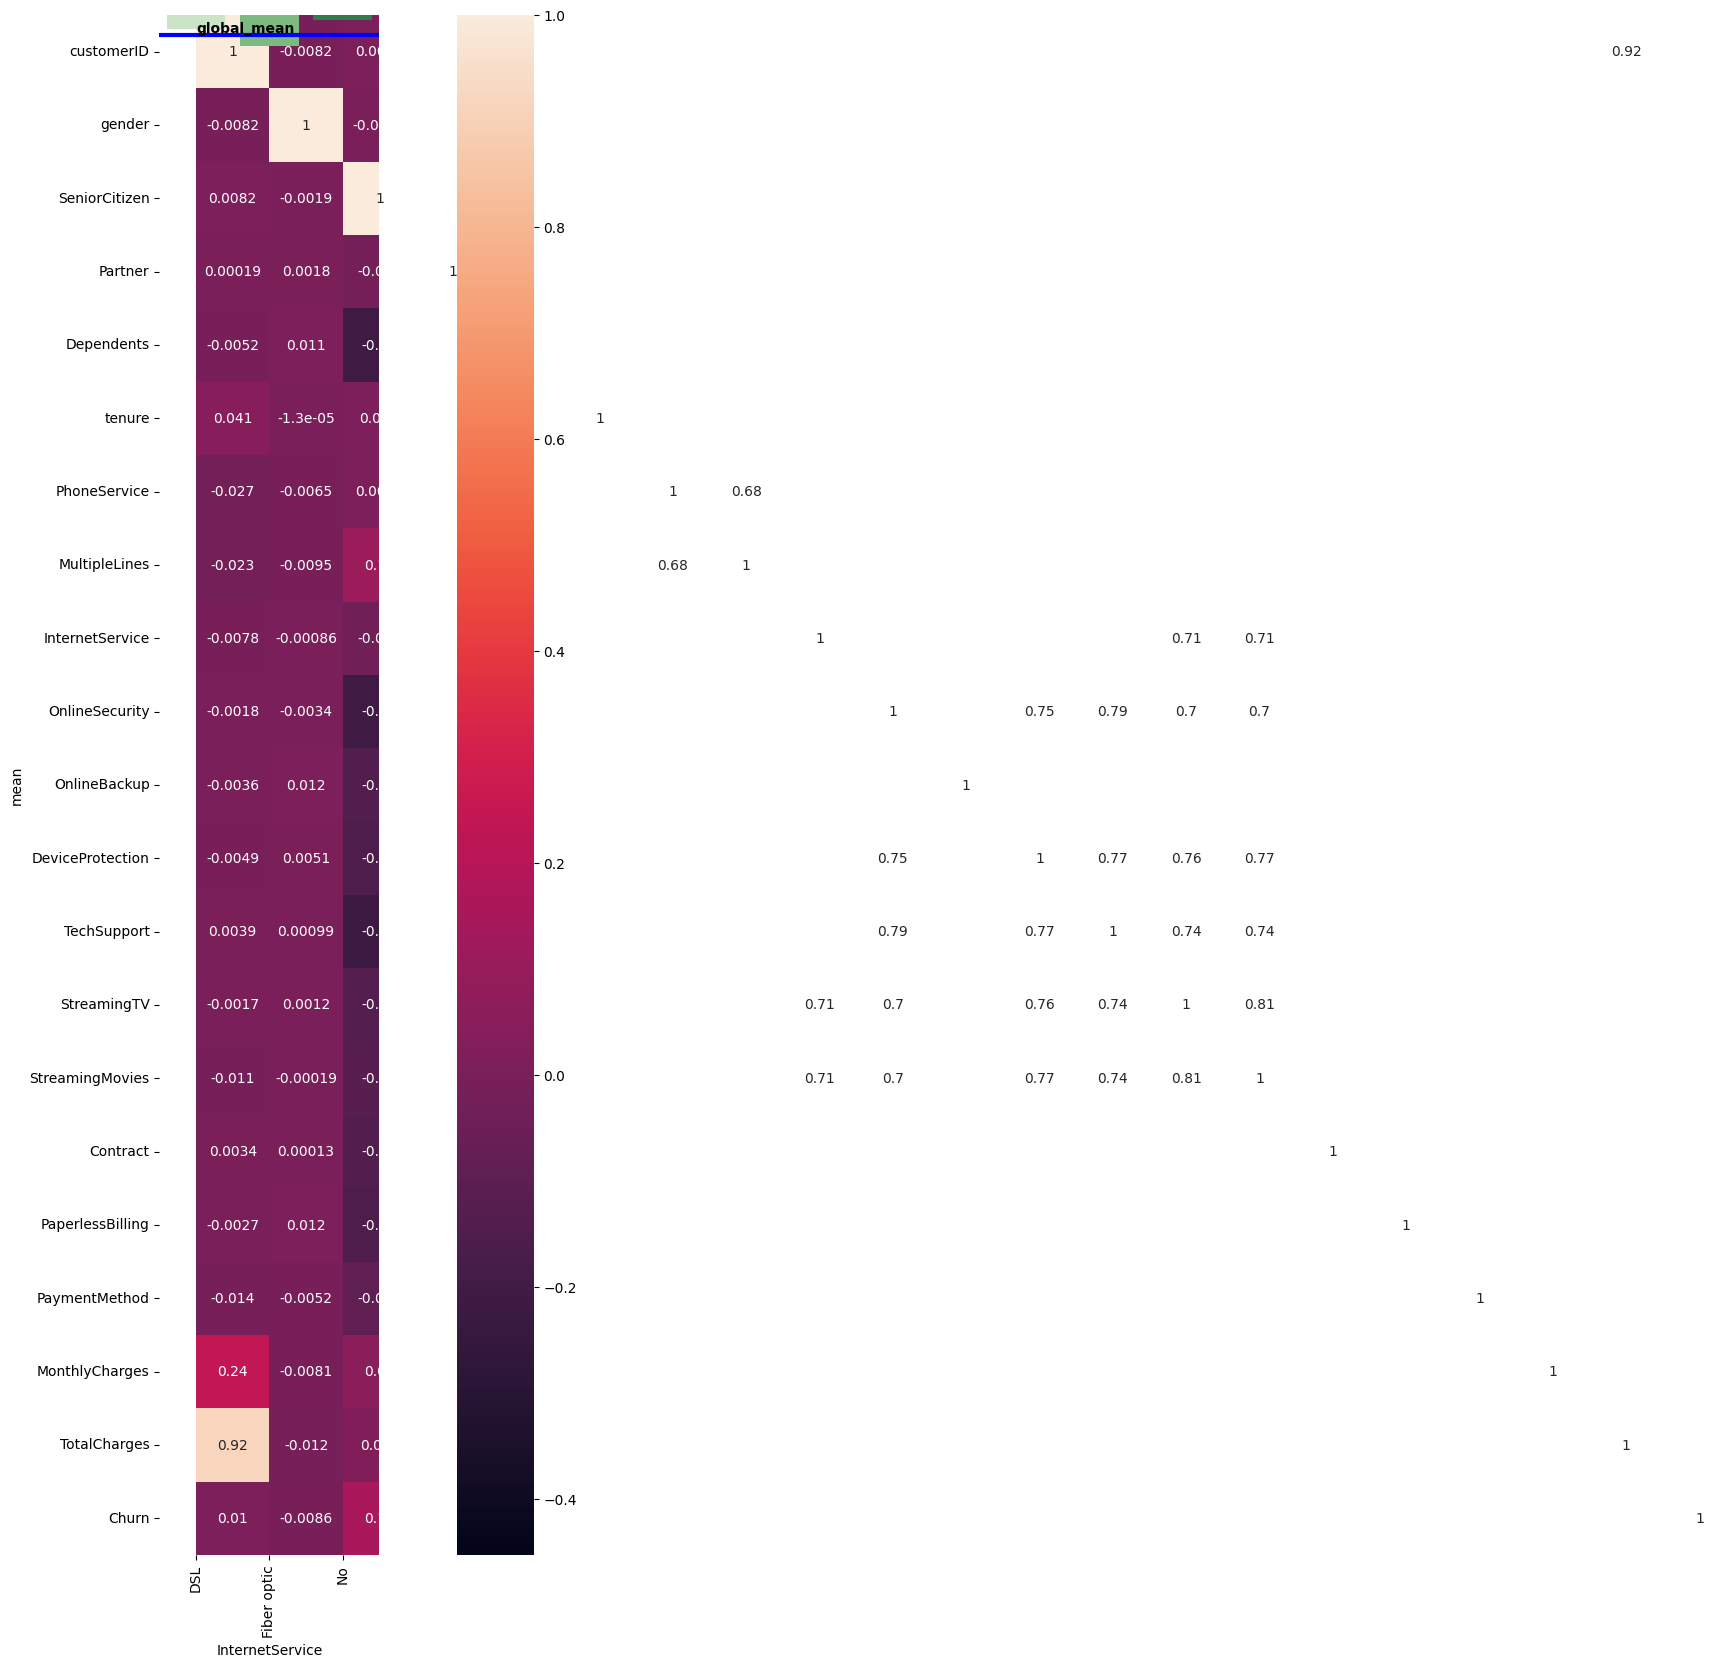

irrelevent variables count:  12
irrelevent variables list:  {'Contract', 'StreamingMovies', 'InternetService', 'DeviceProtection', 'TechSupport', 'tenure', 'Dependents', 'PaymentMethod', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines', 'MonthlyCharges'}


'print(classification_report(y_test, predicted_y))'

<Figure size 1400x700 with 0 Axes>

In [7]:



#loading the dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df

#total rows and cols
df.shape

#information about the dataset
df.info()

plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr,square=True, annot=True,)
# ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1,square=True)



corrs = df.corr()

#Display bar plot for Internet service 
from seaborn import barplot
from matplotlib import pyplot as plt   
import pandas as pd

dataset = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")  # read csv file into variable dataset
dataset['Churn'] = dataset['Churn'].map({'Yes':1, 'No':0})
mean = round(dataset.Churn.mean(),2) # Finding the global mean of churn data and rounding it to 2 decimal places
df_group = dataset.groupby(by='InternetService').Churn.agg(['mean']).reset_index() #group by the gender (Male/Female) and get mean
graph=barplot(x= 'InternetService', y = 'mean', data=df_group, palette='Greens') # plot the gender and mean using barplot
graph.axhline(mean, linewidth=3, color='b')       # show the mean of churn as a line in color blue
plt.text(0, mean - 0.03, "global_mean", color='black', weight='semibold') 
plt.show()

#Display of data for Payment
import plotly.graph_objects as pt
sticker = df['PaymentMethod'].unique()
valcount = df['PaymentMethod'].value_counts()

Pie_chart = pt.Figure(data=[pt.Pie(labels=sticker, values=valcount, hole=.3)])
#fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
Pie_chart.update_layout(title_text="<b> Section Of Payment Method </b>")
Pie_chart.show()

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))
df.head()

plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)



X = df.drop(columns = ['Churn'])
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

feature_correlation = set()
correlation_matrix = X_train.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.3:
            featurename = correlation_matrix.columns[i]
            feature_correlation.add(featurename)

print("irrelevent variables count: ",len(set(feature_correlation)))
print("irrelevent variables list: ",feature_correlation)

"""print(classification_report(y_test, predicted_y))"""






In [8]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1, stratify=y)
lr_model = LogisticRegression()
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7920511000709723


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.8, random_state = 1, stratify=y)
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
print("Linear Regression accuracy is :",rmse)

Linear Regression accuracy is : 0.38012792186487526


In [10]:
sdg_reg=SGDClassifier(loss='log',max_iter=1000,tol=1e-3,random_state=200)
sdg_reg.fit(X_train,y_train)
y_pred=sdg_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test,y_pred)
print("LogiSDGstic Regression accuracy is :",accuracy_lr)

LogiSDGstic Regression accuracy is : 0.7426796805678794


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

